Enter the number of arms (N): 3
Enter the true mean for arm 1: 0.3
Enter the true mean for arm 2: 0.2
Enter the true mean for arm 3: 0.6
Enter the exploration parameter (c): 2
Enter the number of iterations: 1000


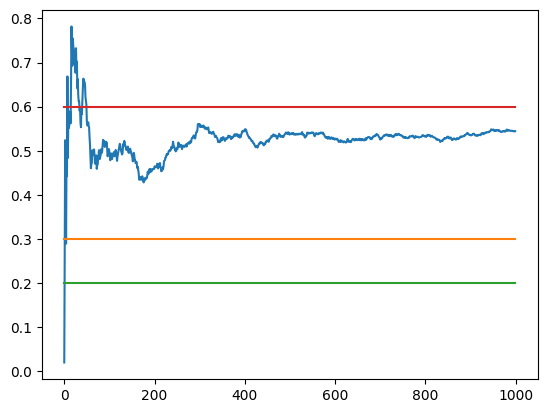

No of times explored:  0
No of times exploited:  1000
Mean of rewards from arm 1: 0
Mean of rewards from arm 2: 0
Mean of rewards from arm 3: 0.5443958243181407


array([0.01993458, 0.29417128, 0.5239182 , 0.45824675, 0.28936662,
       0.48151343, 0.44218995, 0.66850356, 0.48368897, 0.57721879,
       0.5514784 , 0.55732813, 0.58868603, 0.58909179, 0.56213944,
       0.65423842, 0.7818547 , 0.7290544 , 0.69295773, 0.75466284,
       0.73588554, 0.73143472, 0.71499298, 0.70545663, 0.69246984,
       0.6768362 , 0.73253455, 0.68198848, 0.70216156, 0.64150852,
       0.66242556, 0.62609341, 0.61196987, 0.61181204, 0.59084495,
       0.59627262, 0.56336726, 0.55342252, 0.59845505, 0.58315277,
       0.61148696, 0.64160467, 0.66347715, 0.66261167, 0.65671363,
       0.65592733, 0.64905046, 0.62157464, 0.61232077, 0.60472066,
       0.56717954, 0.55761139, 0.55744466, 0.56467182, 0.55694569,
       0.55335734, 0.53078885, 0.51405884, 0.48448733, 0.46038986,
       0.46965817, 0.47151336, 0.50112967, 0.49814619, 0.49162826,
       0.49180948, 0.50307695, 0.48953918, 0.47166535, 0.4704039 ,
       0.48444339, 0.48954232, 0.45906296, 0.46876568, 0.46908

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Action:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        self.mean = 0
        self.N = 0

    def select(self):
        # UCB action selection
        if self.N == 0:
            return self.true_mean
        else:
            return self.mean + np.sqrt(2 * np.log(self.N + 1) / self.N)

    def update(self, x):
        # Update the mean estimate using incremental averaging
        self.N += 1
        self.mean = ((self.N - 1) * self.mean + x) / self.N

def n_arm_bandit_ucb(arms, c, N):
    actions = [Action(mean) for mean in arms]
    data = np.empty(N)
    explore, exploit = 0, 0

    for t in range(N):
        ucb_values = [a.select() for a in actions]
        j = np.argmax(ucb_values)  # UCB action selection
        exploit += 1
        x = np.random.normal(arms[j], 1)  # Reward from chosen arm
        actions[j].update(x)
        data[t] = x

    cumulative_average = np.cumsum(data) / np.arange(1, N + 1)
    plt.plot(cumulative_average)
    for arm_mean in arms:
        plt.plot(np.ones(N) * arm_mean)
    plt.show()

    print("No of times explored: ", explore)
    print("No of times exploited: ", exploit)
    for i, action in enumerate(actions):
        print(f"Mean of rewards from arm {i + 1}: {action.mean}")

    return cumulative_average

# Input the number of arms (N)
n = int(input("Enter the number of arms (N): "))

# Input the true means for each arm
arms = []
for i in range(n):
    true_mean = float(input(f"Enter the true mean for arm {i + 1}: "))
    arms.append(true_mean)

# Input the exploration parameter (c)
c = float(input("Enter the exploration parameter (c): "))

# Number of steps (iterations)
num_iterations = int(input("Enter the number of iterations: "))

# Run the n-arm bandit problem with UCB algorithm
n_arm_bandit_ucb(arms, c, num_iterations)


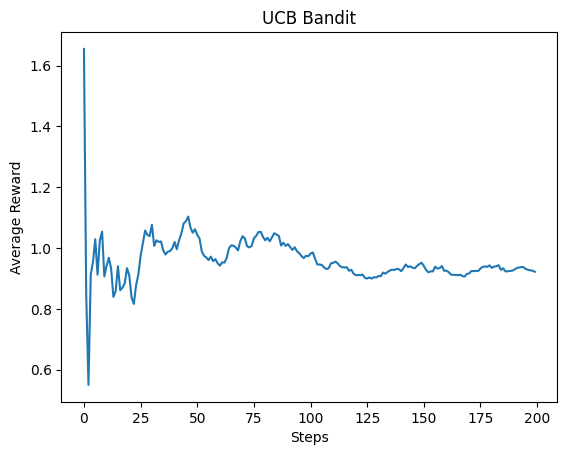

Estimated mean of arm 1: 0
Estimated mean of arm 2: 0
Estimated mean of arm 3: 0
Estimated mean of arm 4: 0
Estimated mean of arm 5: 0.9222513727845374


In [ ]:
c1 = ucb_bandit(arms,200)
